<a href="https://colab.research.google.com/github/1995anas/Prediction_of_Product_Sales/blob/main/Copy_of_Copy_of_Prediction_of_Prodcut_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicion of Product Sales
- Author: Anas Abu Alhaija


## Project Overview

## Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fpath ='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows/columns:

In [ ]:
df_sales.shape

(8523, 12)

- There are 8523 rows and 12 columns

Checking the data types:



In [ ]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Checking for duplicated data:

In [ ]:
df_sales.duplicated().sum()

0

There are no duplicates in rows

--Duplicates in a subset

In [ ]:
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
duplicated_Id = df_sales.duplicated(subset=['Item_Identifier'])
duplicated_Id.sum()

6964

we will drop it because Item_Identifier isn't special for each item:

In [ ]:
df_sales = df_sales.drop(columns = ['Item_Identifier'])
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Missing Values
Checking for missing values:

In [ ]:
df_sales.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column.
  - There are `2410` missing values in the `Outlet_Size` column.


- Confirm that there are no missing values after addressing them

In [ ]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)
df_sales.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
df_sales['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

### Fixing Consistency:

In [ ]:
obj_col = df_sales.select_dtypes('object').columns
obj_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in obj_col:
  print(f'The value counts for {col}')
  print(df_sales[col].value_counts())
  print('\n')

The value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


The value counts for Outlet_Size
Medium     2793
MISSING    2410
Small      2388


In [ ]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### The summary statistics (max,min,mean) for numerical columns:

In [ ]:
num_col = df_sales.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
for col in num_col:
  print(f'The summary statistics (min,max,mean) for {col} are:')
  print(df_sales[col].min())
  print(df_sales[col].max())
  print(df_sales[col].mean())
  print('\n')


The summary statistics (min,max,mean) for Item_Weight are:
-1.0
21.35
10.478936407368296


The summary statistics (min,max,mean) for Item_Visibility are:
0.0
0.328390948
0.06613202877895108


The summary statistics (min,max,mean) for Item_MRP are:
31.29
266.8884
140.9927819781767


The summary statistics (min,max,mean) for Outlet_Establishment_Year are:
1985
2009
1997.8318667135984


The summary statistics (min,max,mean) for Item_Outlet_Sales are:
33.29
13086.9648
2181.288913575032




## Exploratory Data Analysis

### Histograms to view the distributions of numerical features in your dataset:



In [ ]:
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

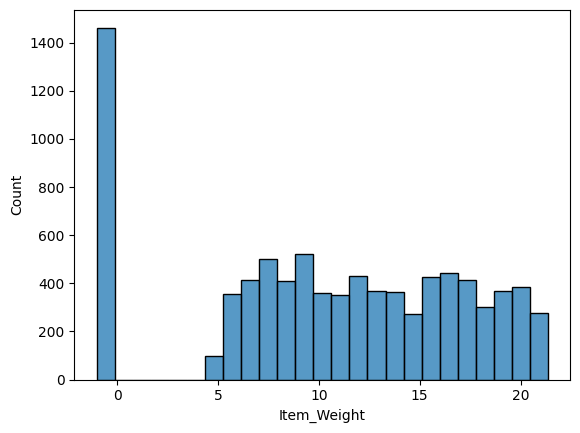

In [ ]:
ax = sns.histplot(data=df_sales,x='Item_Weight');

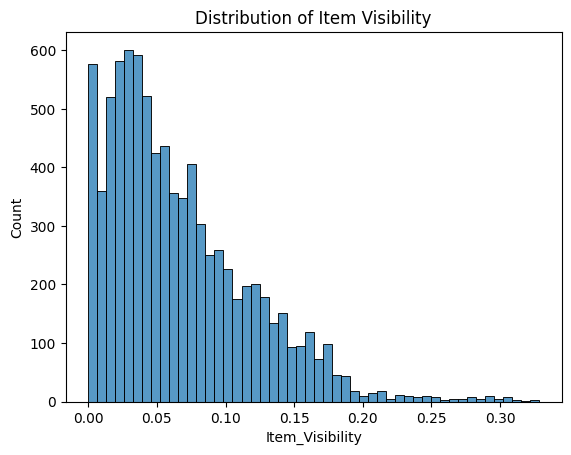

In [ ]:
ax = sns.histplot(data=df_sales,x='Item_Visibility');
ax.set_title('Distribution of Item Visibility');

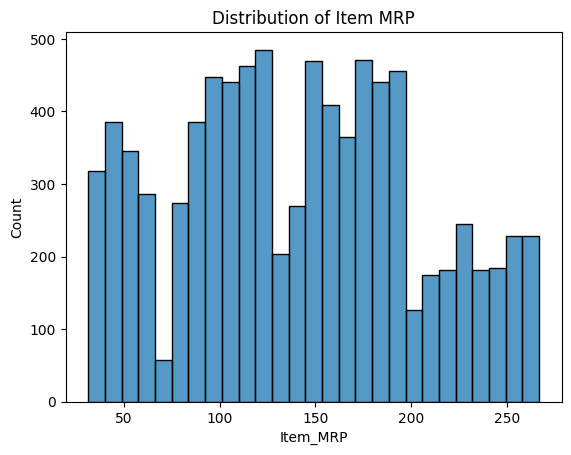

In [ ]:
ax = sns.histplot(data=df_sales,x='Item_MRP');
ax.set_title('Distribution of Item MRP');

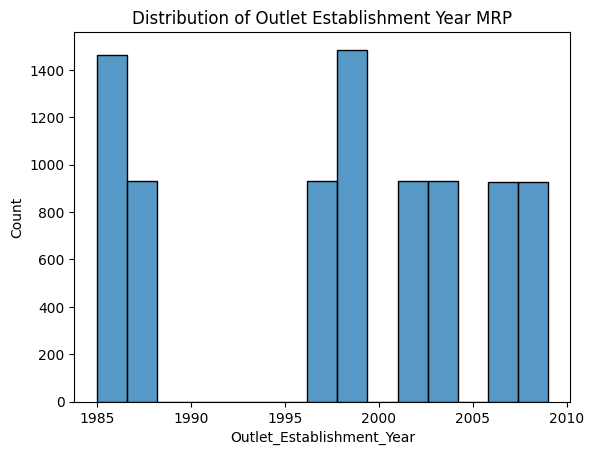

In [ ]:
ax = sns.histplot(data=df_sales,x='Outlet_Establishment_Year');
ax.set_title('Distribution of Outlet Establishment Year MRP');

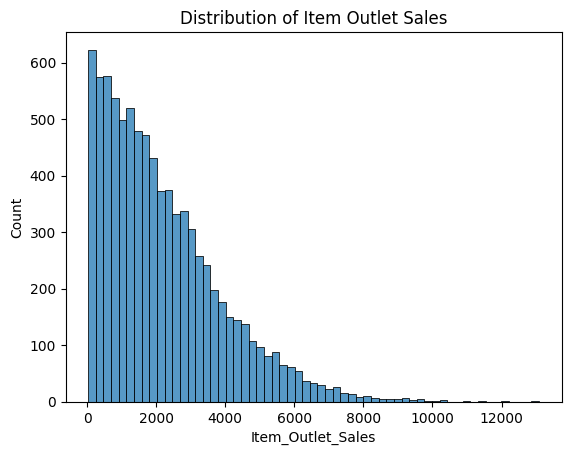

In [ ]:
ax = sns.histplot(data=df_sales,x='Item_Outlet_Sales');
ax.set_title('Distribution of Item Outlet Sales');

### Boxplots to view statistical summaries of numerical features in your dataset:

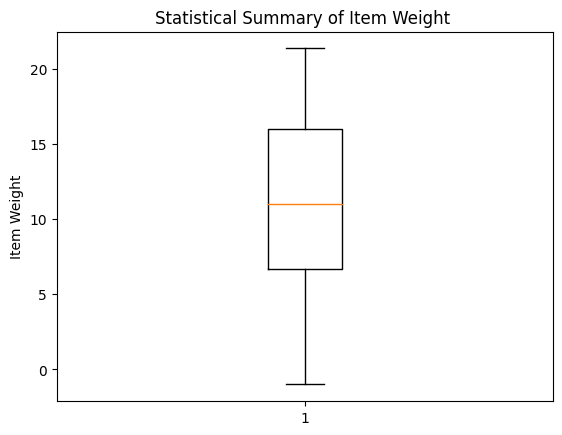

In [ ]:
fig, ax= plt.subplots()
data = df_sales['Item_Weight']
ax.boxplot(data);
ax.set_ylabel('Item Weight');
ax.set_title('Statistical Summary of Item Weight ');

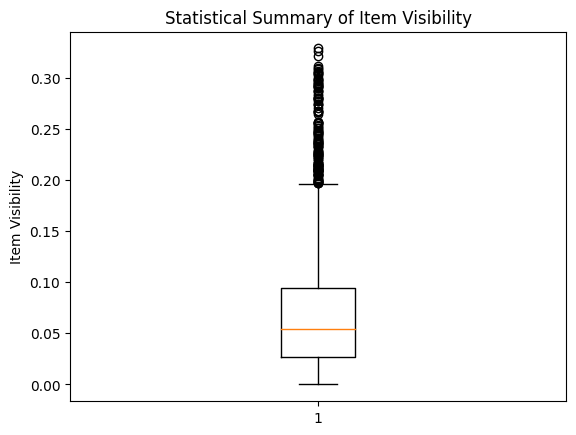

In [ ]:
fig, ax= plt.subplots()
data = df_sales['Item_Visibility']
ax.boxplot(data);
ax.set_ylabel('Item Visibility');
ax.set_title('Statistical Summary of Item Visibility');

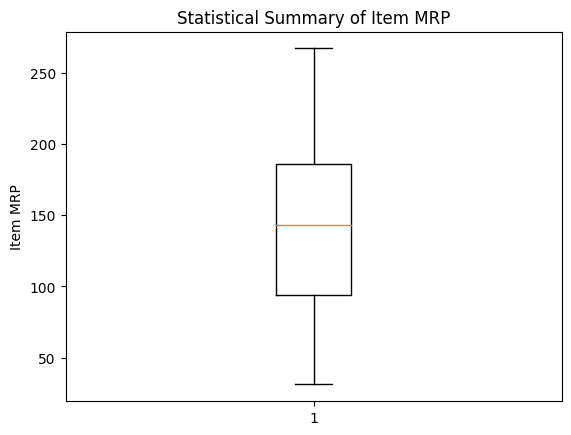

In [ ]:
fig, ax= plt.subplots()
data = df_sales['Item_MRP']
ax.boxplot(data);
ax.set_ylabel('Item MRP');
ax.set_title('Statistical Summary of Item MRP');

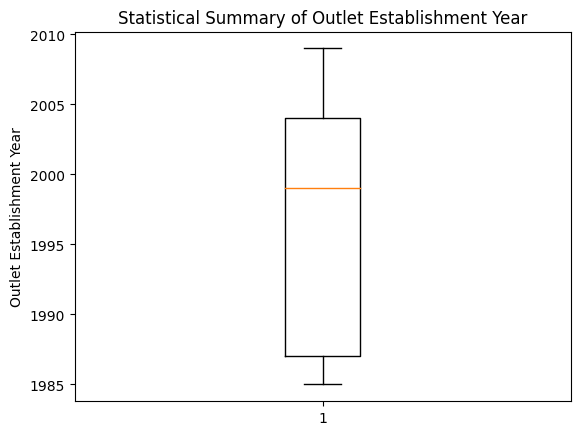

In [ ]:
fig, ax= plt.subplots()
data = df_sales['Outlet_Establishment_Year']
ax.boxplot(data);
ax.set_ylabel('Outlet Establishment Year');
ax.set_title('Statistical Summary of Outlet Establishment Year');

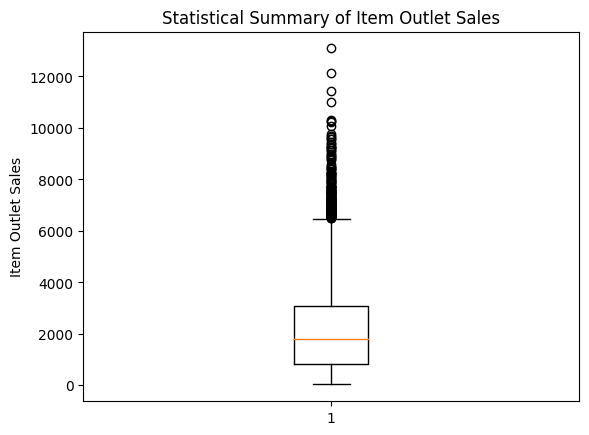

In [ ]:
fig, ax= plt.subplots()
data = df_sales['Item_Outlet_Sales']
ax.boxplot(data);
ax.set_ylabel('Item Outlet Sales');
ax.set_title('Statistical Summary of Item Outlet Sales');

### Countplots to view the frequency of each class of categorial features in your dataset:

In [ ]:
obj_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

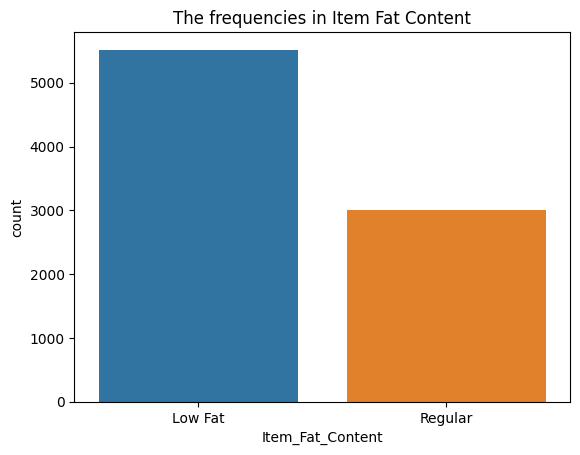

In [ ]:
ax = sns.countplot(data=df_sales, x='Item_Fat_Content')
ax.set_title('The frequencies in Item Fat Content');

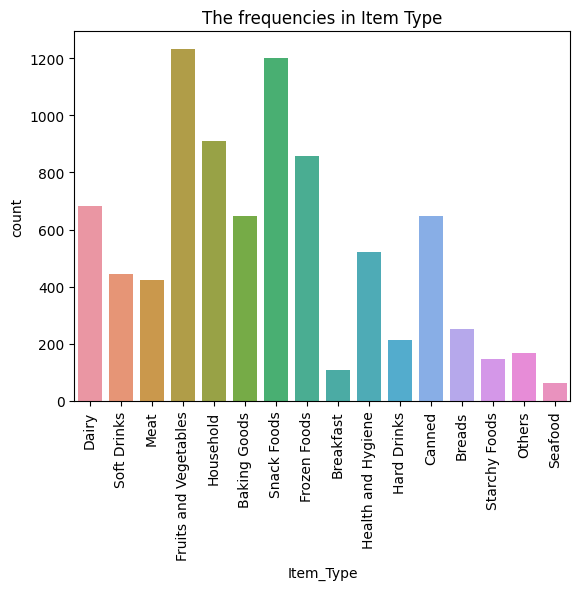

In [ ]:
ax = sns.countplot(data=df_sales, x='Item_Type')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('The frequencies in Item Type');

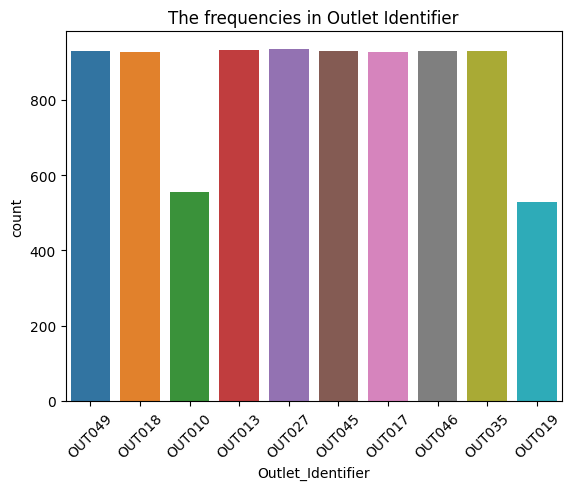

In [ ]:
ax = sns.countplot(data=df_sales, x='Outlet_Identifier');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('The frequencies in Outlet Identifier');

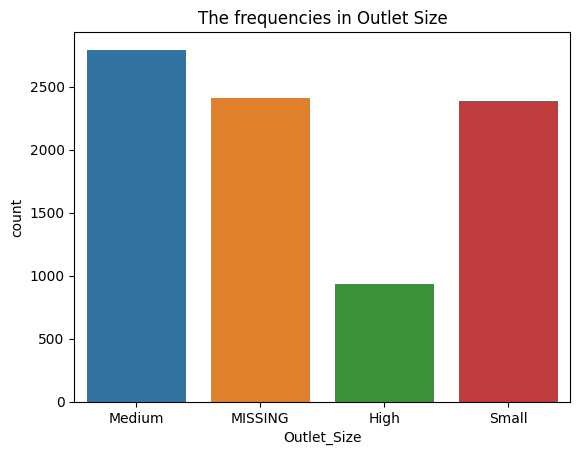

In [ ]:
ax = sns.countplot(data=df_sales, x='Outlet_Size');
ax.set_title('The frequencies in Outlet Size');

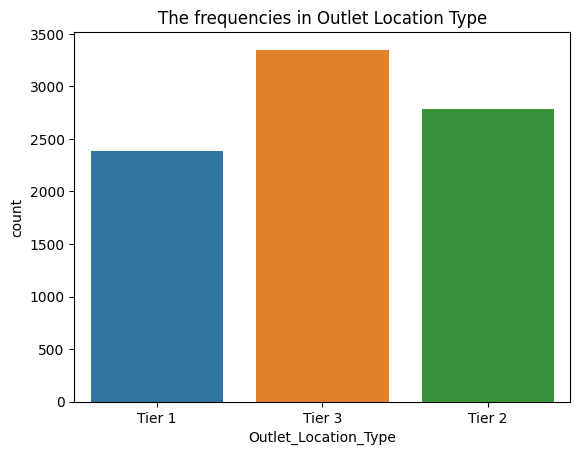

In [ ]:
ax = sns.countplot(data=df_sales, x='Outlet_Location_Type');
ax.set_title('The frequencies in Outlet Location Type');

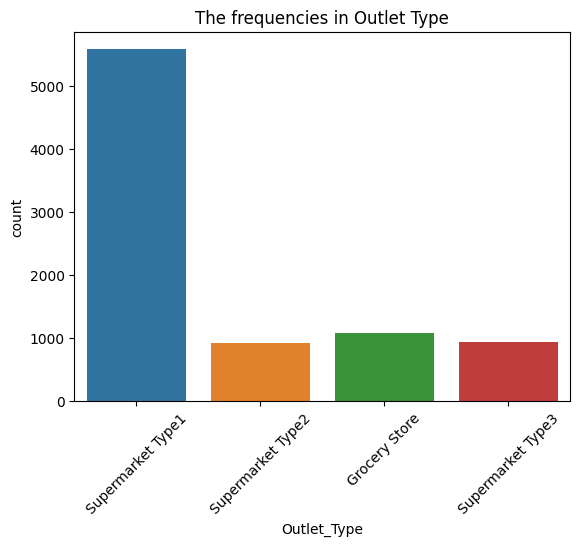

In [ ]:
ax = sns.countplot(data=df_sales, x='Outlet_Type');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('The frequencies in Outlet Type');

### Heatmap to view the correlation between features:

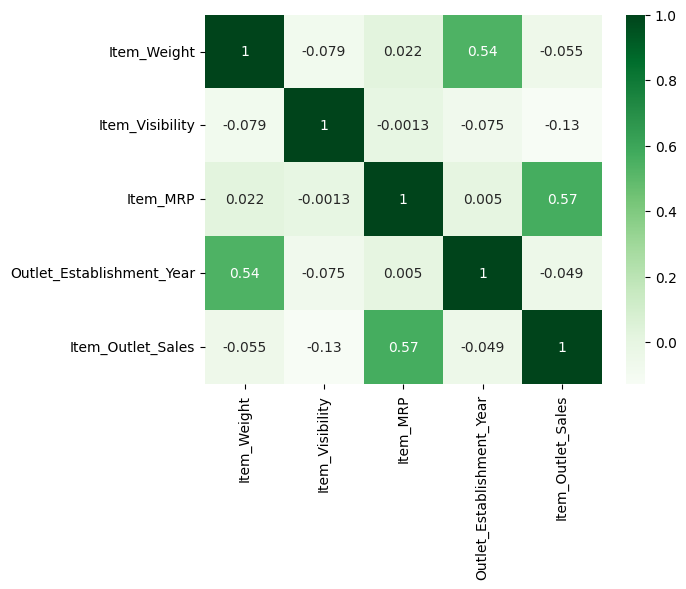

In [ ]:
corr = df_sales.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr,cmap = 'Greens',annot= True);

## Feature Inspection